In [2]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [7]:
def coin_flip():
    return random.choice(["heads", "tails"])

In [8]:
def simulation(n=16):
    count = 0
    heads = 0
    tails = 0
    total_heads = []
    total_tails = []
    while count < 2 ** n:
        flip = coin_flip()
        if flip == "heads":
            heads += 1
        else:
            tails += 1
        count +=1
        for num in range(n+1):
            if count == 2**num:
                total_heads.append(heads)
                total_tails.append(tails)
    return total_heads, total_tails      


In [9]:
h, t = simulation()

In [10]:
print(h)
print(t)

[0, 1, 2, 3, 7, 15, 30, 64, 128, 259, 505, 980, 2000, 3994, 8079, 16287, 32769]
[1, 1, 2, 5, 9, 17, 34, 64, 128, 253, 519, 1068, 2096, 4198, 8305, 16481, 32767]


#Difference Plots

In [12]:
d_list = [h[index] - t[index] for index in range(len(h))]


In [13]:
print(d_list)

[-1, 0, 0, -2, -2, -2, -4, 0, 0, 6, -14, -88, -96, -204, -226, -194, 2]


Line Plot

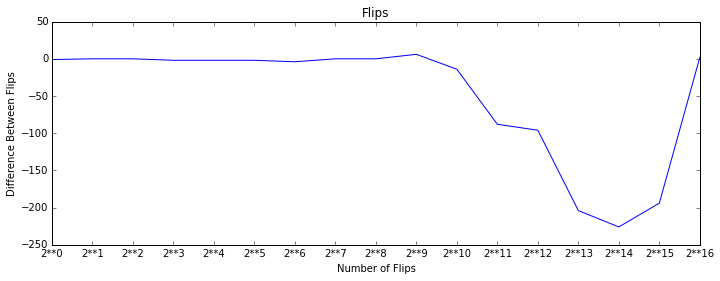

In [38]:
x_title = ["2**" + str(i) for i in range(17)]
plt.plot(d_list)
plt.xticks(range(17), x_title)
plt.xlabel("Number of Flips")
plt.ylabel("Difference Between Flips")
plt.title("Flips")
plt.subplots_adjust(left=2, right=3.5)
plt.show()

Notes: The difference between heads and tails appears to increase with more flips but this is not actually true because as the difference becomes greater the total number of flips is also increasing. 

Scatter Plot

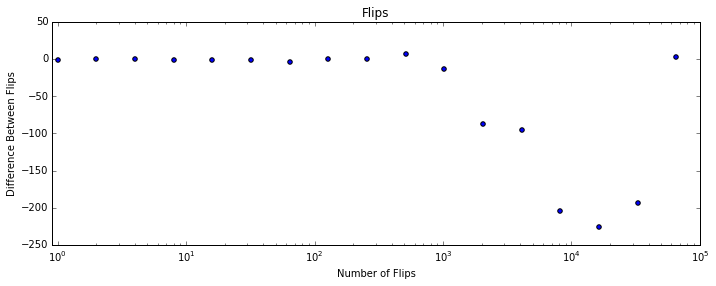

In [66]:
x_diff_scatter = [2**n for n in range(17)]
y_diff_scatter = d_list
plt.scatter(x_diff_scatter, y_diff_scatter)
plt.xscale('log')
plt.xlabel("Number of Flips")
plt.ylabel("Difference Between Flips")
plt.title("Flips")
xmin, xmax, ymin, ymax = plt.axis()
plt.axis([.9, xmax, ymin, ymax])
plt.subplots_adjust(left=2, right=3.5)
plt.show()

Notes: The 17 points represent the difference between the number of heads and tails at that number of flips. The scatter plot looks similar to the line plot because the x axis is a log of 2 and 10. 

#Ratio Plots

In [39]:
ratio = [h[index] / t[index] for index in range(len(h))]

Line Plot

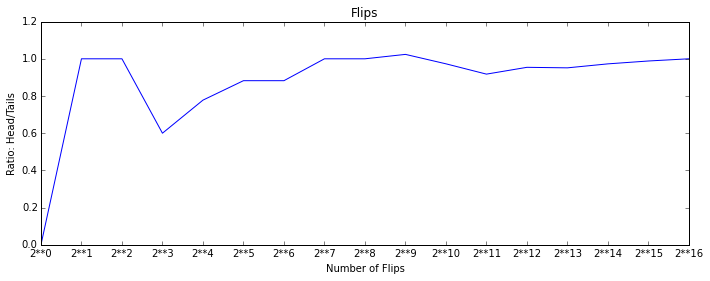

In [143]:
x_title = ["2**" + str(i) for i in range(17)]
plt.plot(ratio)
plt.xticks(range(17), x_title)
plt.xlabel("Number of Flips")
plt.ylabel("Ratio: Head/Tails")
plt.title("Flips")
plt.subplots_adjust(left=2, right=3.5)
plt.show()

Notes: The ratio increases from 0 to 1 on, or close, to the second coin flip. The variation is noticable with fewer flips. However, as teh number of flips increases the ratio becauses closer to 50/50 odds.

Scatter Plot

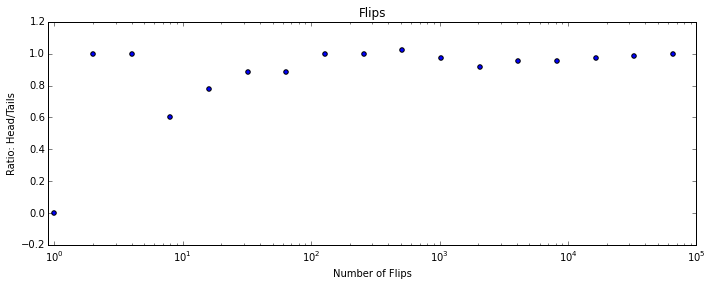

In [142]:
x_ratio_scatter = [2**n for n in range(17)]
y_ratio_scatter = ratio
plt.scatter(x_ratio_scatter, y_ratio_scatter)
plt.xscale('log')
plt.xlabel("Number of Flips")
plt.ylabel("Ratio: Head/Tails")
plt.title("Flips")
xmin, xmax, ymin, ymax = plt.axis()
plt.axis([.9, xmax, ymin, ymax])
plt.subplots_adjust(left=2, right=3.5)
plt.show()

#Multiple Simulations

In [118]:
def multi_sim(num=20):
    ratio_dict = {}
    for j in range(17):
        ratio_dict[j] = []
    for i in range(num):
        h, t = simulation()
        for x in range(len(h)):
            if t[x] != 0: 
                ratio_dict[x].append(h[x]/t[x])
            else:
                ratio_dict[x].append(0)
    return ratio_dict

In [122]:
multi_sim_by_round = multi_sim()

In [123]:
len(multi_sim_by_round[2])

20

In [126]:
print(multi_sim_by_round[1])

[1.0, 0.0, 0, 1.0, 1.0, 0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


Mean of ratios for each round

In [145]:
def mean_ratios(multi_sim_by_round):
    return [st.mean(v) for k, v in multi_sim_by_round.items()]

In [146]:
print(ratio)

[0.0, 1.0, 1.0, 0.6, 0.7777777777777778, 0.8823529411764706, 0.8823529411764706, 1.0, 1.0, 1.023715415019763, 0.9730250481695568, 0.9176029962546817, 0.9541984732824428, 0.9514054311576942, 0.972787477423239, 0.9882288696074267, 1.000061037018952]


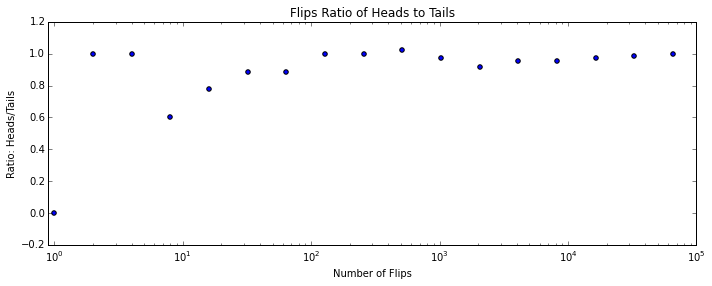

In [153]:
x_mean_ratio = [2**n for n in range(17)]
y_mean_ratio = ratio
plt.scatter(x_mean_ratio, y_mean_ratio)
plt.xscale('log')
plt.xlabel("Number of Flips")
plt.ylabel("Ratio: Heads/Tails")
plt.title("Flips Ratio of Heads to Tails")
xmin, xmax, ymin, ymax = plt.axis()
plt.axis([.9, xmax, ymin, ymax])
plt.subplots_adjust(left=2, right=3.5)
plt.show()

Notes: The ratio between heads and tails becomes closer to one with more flips. 

In [144]:
def stdev_ratios(multi_sim_by_round):
    return [st.stdev(v) for k, v in multi_sim_by_round.items()]

In [150]:
st_dev = stdev_ratios(multi_sim_by_round)

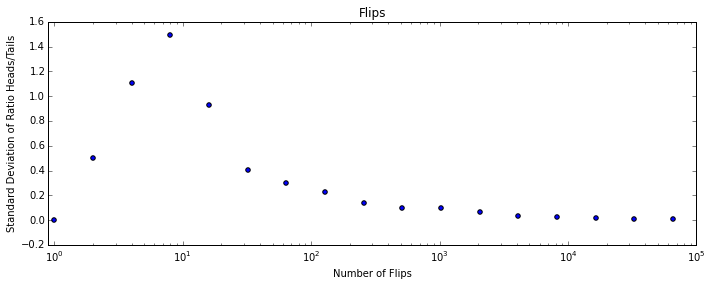

In [152]:
x_st_ratio = [2**n for n in range(17)]
y_st_ratio = st_dev
plt.scatter(x_st_ratio, y_st_ratio)
plt.xscale('log')
plt.xlabel("Number of Flips")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Ratio Heads/Tails")
xmin, xmax, ymin, ymax = plt.axis()
plt.axis([.9, xmax, ymin, ymax])
plt.subplots_adjust(left=2, right=3.5)
plt.show()

Notes: The standard deviation becomes closer to 0 with more flips because the difference between heads and tails is less.

In [159]:
def flip_n(n=100):
    count = 0
    heads = 0
    tails = 0
    while count < n:
        flip = coin_flip()
        if flip == "heads":
            heads += 1
        else:
            tails += 1
        count +=1
    ratio = heads/tails
    return ratio
    

In [160]:
flip_ratio = flip_n()

In [161]:
print(flip_ratio)

1.127659574468085


In [163]:
number_of_trials = 100000
def trial(number_of_trials, n=100):
    results = [flip_n(n) for i in range(number_of_trials)]
    return results
    

In [164]:
trial_results = trial(number_of_trials)

In [165]:
len(trial_results)

100000

In [166]:
print(trial_results[700])

1.127659574468085


In [167]:
trial_by_1000 = trial(100000, 1000)

In [168]:
len(trial_by_1000)

100000

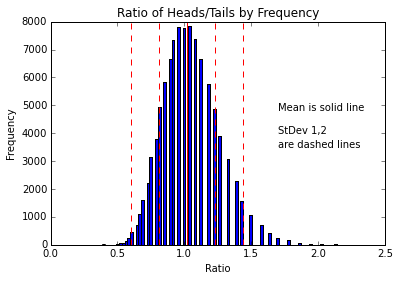

In [187]:
plt.hist(trial_results, bins=100)
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Ratio of Heads/Tails by Frequency")
ymin, ymax = plt.ylim()
mean = statistics.mean(trial_results)
stdev = statistics.stdev(trial_results)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.text(1.7, 4800, "Mean is solid line")
plt.text(1.7, 4000, "StDev 1,2")
plt.text(1.7, 3500, "are dashed lines")
plt.show()

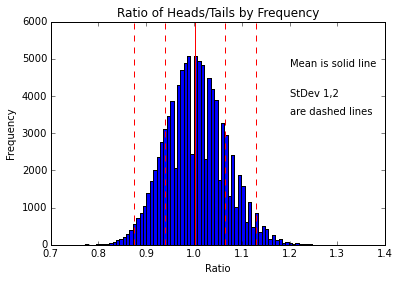

In [185]:
plt.hist(trial_by_1000, bins=75)
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Ratio of Heads/Tails by Frequency")
ymin, ymax = plt.ylim()
mean = st.mean(trial_by_1000)
stdev = st.stdev(trial_by_1000)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.text(1.2, 4800, "Mean is solid line")
plt.text(1.2, 4000, "StDev 1,2")
plt.text(1.2, 3500, "are dashed lines")
plt.show()

Notes: The bell curve comes closer to 0 because the amount of flips increases from 100 to 1000 per round. 

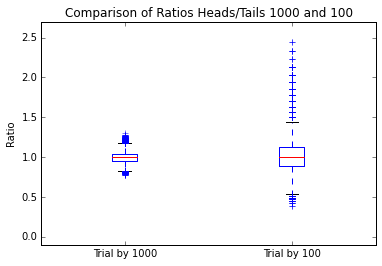

In [191]:
plt.boxplot([trial_by_1000, trial_results])
ymin, ymax = plt.ylim()
plt.ylim(ymin - .1, ymax + .2)
plt.title("Comparison of Ratios Heads/Tails 1000 and 100")
plt.ylabel("Ratio")
plt.xticks(range(1,3), ["Trial by 1000", "Trial by 100"])
plt.show()

Notes: The outliers become less as the number of flips per round increases by 10. 